# Forecast predictions in offshore and coastal points
# in Cantabria, Spain

### please contact jtausiahoyal@gmail.com for more information

With this jupyter notebook, forecasts of the waves can be done in Cantabria, Spain just running all the cells below. Data is downloaded from the [NOAA](https://www.noaa.gov/) website and used for the local predictions. In case the methodology followed wanna be studied in detail, refer to the Forecast_CAN class in the repository, and to all the available notebooks as they explain step by step the procedure.

But briefly explained, this notebook download the data, save and plot it and then, reconstruct the predictions using RBF in coastal points using the previously propagated cases with SWAN (refer to the notebooks and the paper in the repo for more information).

This notebook focuses in Cantabria, a very interesting surfing region in the north of Spain. With this interactive notebook, you will be able to reconstruct the forecast wave climate in the next week and all around the coast of this region.

Because of the constraints on the hybrid method, the SWAN model has been executed in 4 different regions that are shown below:

![4bathys](../images/data/totalbat.png)

In [1]:
# basic imports
import sys
import os
import os.path as op
import datetime

# dev library
sys.path.insert(0, op.join(os.path.abspath('')))

# Forecast module
from forecast_CAN import Forecast_CAN

Pulling the data from: 

https://nomads.ncep.noaa.gov/dods/wave/mww3/20200906/multi_1.glo_30mext20200906_00z


The times with forecast go from 2020-09-07 00:00:00 to 2020-09-14 12:00:00 

Generating images and GIF in "path"... 



Number of images to plot from the total? 
TOTAL: 61, To plot: 
3
Plotting time: 2020-09-07 00:00:00...
Plotting time: 2020-09-09 12:00:00...
Plotting time: 2020-09-12 00:00:00...
Plotting time: 2020-09-14 12:00:00...

 GIF generated and saved!! 



<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    title: Multi-grid wave model: Global 30 arc-min grid from 00Z06sep2020 downloaded Sep 06 04:23 UTC
    Conventions: COARDS
GrADS
    dataType: Grid
    history: Sun Sep 06 04:32:09 GMT 2020 : imported by GrADS Data Server 2.0
    dimensions(sizes): lat(336), lon(720), time(61)
    variables(dimensions): float64 time(time), float64 lat(lat), float64 lon(lon), float32 dirpwsfc(time,lat,lon), float32 htsgwsfc(time,lat,lon

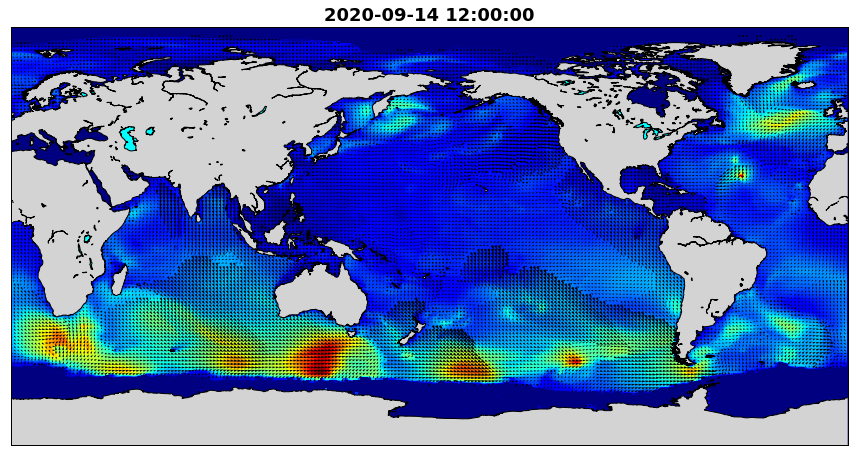

In [2]:
date         = datetime.date.today() # today or ex: '20200707'
date         = date.strftime("%Y%m%d")
images_path  = op.join(os.getcwd(), '..', 'images', 'forecast') # save images and GIF
location     = (44.0, -3.8) # location to see the forecast
delta_lon    = 1
delta_lat    = 0.2

forecast = Forecast_CAN(date=date, 
                        images_path=images_path, 
                        location=location,
                        delta_lon=delta_lon,
                        delta_lat=delta_lat)

print(forecast.forecast)

In [3]:
forecast_data = forecast.plot_region(zoom=8)

Location in (44.0, -3.8)!! 

These are the coordinates in the selected region: 

[44.]
[355.5 356.  356.5 357. ]




Map(center=[44.0, 356.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…


 If selected coordinates are not desired, 
please rerun the notebook with the desired parameters!! 

Saving the data in the shown region... 

<xarray.Dataset>
Dimensions:    (lat: 1, lon: 4, time: 61)
Coordinates:
  * time       (time) datetime64[ns] 2020-09-07 ... 2020-09-14T12:00:00
  * lat        (lat) float64 44.0
  * lon        (lon) float64 355.5 356.0 356.5 357.0
Data variables:
    Hsea       (time, lat, lon) float32 0.83 9.999e+20 ... 9.999e+20 9.999e+20
    Tpsea      (time, lat, lon) float32 5.02 9.999e+20 ... 9.999e+20 9.999e+20
    Dirsea     (time, lat, lon) float32 26.099998 9.999e+20 ... 9.999e+20
    Hswell1    (time, lat, lon) float32 1.3399999 1.51 1.5999999 ... 2.12 2.05
    Tpswell1   (time, lat, lon) float32 9.98 10.29 10.4 ... 12.25 12.08 11.95
    Dirswell1  (time, lat, lon) float32 310.69 328.1 318.94998 ... 312.56 312.11
    Hswell2    (time, lat, lon) float32 0.69 0.62 ... 9.999e+20 9.999e+20
    Tpswell2   (time, lat, lon) float32 12.38 12.61 ... 9.999e+20 

In this plot below, the principal beaches of Cantabria are shown and below this cell, the coordinates of the beaches are also shown:

![coast](../images/data/coast.png)

In [4]:
p_data_swan = op.join(os.getcwd(), '..', 'data', 'projects-swan')

# -------------- EDIT THIS PART --------------------------------------------- #
info = {
    'name'       : ['SVI', 'SDR', 'BRS', 'BIO'], # used name in the SWAN section
    'resolution' : [str(0.0024), str(0.0024), str(0.0024), str(0.0024)], # used resolution in the SWAN section
    'num_cases'  : [str(300), str(300), str(300), str(300)] # num cases run in SWAN
}     
# --------------------------------------------------------------------------- #

# Example coordinates for the forecast reconstruction:
# SanVi           43.41, -4.38
# Oyambre         43.41, -4.31
# Los Locos       43.44  -4.06
# Liencres        43.46, -3.97
# La Vaca         43.49  -3.82
# Sardinero       43.48, -3.76
# Somo            43.47, -3.74
# Brusco          43.47  -3.48
# Berria          43.47, -3.45
# Laredo          43.42, -3.42
# Sona-Ori        43.42, -3.31
# Mundaka         43.45, -2.73   (not shown in final plot, 
#                                 change coords in python class if wanted)

forecasts_list = forecast.forecast_reconstruction(p_data_swan=p_data_swan,
                                                  info=info,
                                                  forecast_data=forecast_data)


 Select the number of points to reconstruct in GRID 1 : 
2


Select the desired point to reconstruct in GRID 1 as it is given in Google Maps: 

Latitude location to obtain the forecast reconstruction: 43.41
Longitude location to obtain the forecast reconstruction: 
-4.38



 Forecast in the selected region will be calculated!! 

Performing RFB reconstruction... 

ix_scalar: 0,  optimization: 5.97 | interpolation: 0.00
ix_scalar: 1,  optimization: 12.15 | interpolation: 0.00
ix_scalar: 2,  optimization: 4.82 | interpolation: 0.00
ix_scalar: 4,  optimization: 12.37 | interpolation: 0.01
ix_directional: 3,  optimization: 13.92 | interpolation: 0.01
ix_scalar: 0,  optimization: 6.03 | interpolation: 0.00
ix_scalar: 1,  optimization: 12.72 | interpolation: 0.00
ix_scalar: 2,  optimization: 12.61 | interpolation: 0.00
ix_scalar: 4,  optimization: 5.56 | interpolation: 0.00
ix_directional: 3,  optimization: 9.68 | interpolation: 0.01
ix_scalar: 0,  optimization: 6.23 | interpolation: 0.01
ix

ix_scalar: 4,  optimization: 6.19 | interpolation: 0.00
ix_directional: 3,  optimization: 11.41 | interpolation: 0.01
ix_scalar: 0,  optimization: 6.28 | interpolation: 0.00
ix_scalar: 1,  optimization: 12.83 | interpolation: 0.00
ix_scalar: 2,  optimization: 6.79 | interpolation: 0.00
ix_scalar: 4,  optimization: 6.86 | interpolation: 0.00
ix_directional: 3,  optimization: 9.35 | interpolation: 0.01
ix_scalar: 0,  optimization: 4.74 | interpolation: 0.00
ix_scalar: 1,  optimization: 12.81 | interpolation: 0.00
ix_scalar: 2,  optimization: 6.84 | interpolation: 0.00
ix_scalar: 4,  optimization: 6.55 | interpolation: 0.00
ix_directional: 3,  optimization: 9.60 | interpolation: 0.01


Saving the data in list... 


 SAVED!!! 


 Select the number of points to reconstruct in GRID 3 : 
4


Select the desired point to reconstruct in GRID 3 as it is given in Google Maps: 

Latitude location to obtain the forecast reconstruction: 43.47
Longitude location to obtain the forecast reconstruction: 


 


 Number of images to plot from the total? 
TOTAL: 61, To plot: 
20
Plotting time: 2020-09-07 00:00:00...
Plotting time: 2020-09-07 09:00:00...
Plotting time: 2020-09-07 18:00:00...
Plotting time: 2020-09-08 03:00:00...
Plotting time: 2020-09-08 12:00:00...
Plotting time: 2020-09-08 21:00:00...
Plotting time: 2020-09-09 06:00:00...
Plotting time: 2020-09-09 15:00:00...
Plotting time: 2020-09-10 00:00:00...
Plotting time: 2020-09-10 09:00:00...
Plotting time: 2020-09-10 18:00:00...
Plotting time: 2020-09-11 03:00:00...
Plotting time: 2020-09-11 12:00:00...
Plotting time: 2020-09-11 21:00:00...
Plotting time: 2020-09-12 06:00:00...
Plotting time: 2020-09-12 15:00:00...
Plotting time: 2020-09-13 00:00:00...
Plotting time: 2020-09-13 09:00:00...
Plotting time: 2020-09-13 18:00:00...
Plotting time: 2020-09-14 03:00:00...
Plotting time: 2020-09-14 12:00:00...

 GIF generated and saved!! 





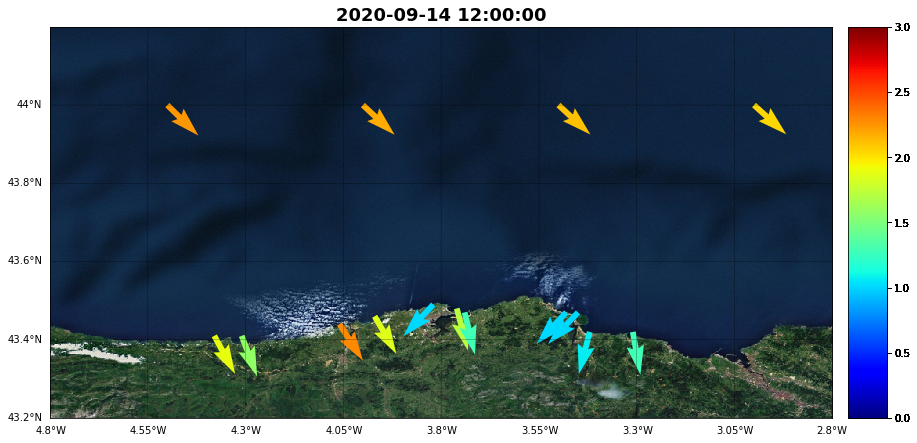

In [5]:
forecast.plot_results(forecasts_list=forecasts_list)